In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
diabetes = pd.read_csv('diabetic_data.csv')

In [3]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
# to keep only columns of interest(demographic data, medications and readmitted)
diabetes = diabetes.loc[:, ~diabetes.columns.isin(['encounter_id','patient_nbr','weight','admission_type_id',
                                                   'discharge_disposition_id','admission_source_id','payer_code',
                                                   'medical_specialty','diag_1','diag_2','diag_3','number_diagnoses',
                                                   'max_glu_serum','A1Cresult','change','diabetesMed'])]

In [5]:
diabetes.age = diabetes.age.str[1:-1]

In [6]:
diabetes.loc[0:100000:10000]

,race,gender,age,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,...,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,readmitted
0,Caucasian,Female,0-10,1,41,0,1,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
10000,Caucasian,Female,80-90,9,61,1,14,0,0,0,...,No,No,No,No,No,No,No,No,No,>30
20000,Caucasian,Male,60-70,9,56,2,30,0,0,1,...,No,No,No,Steady,No,No,No,No,No,>30
30000,Caucasian,Male,40-50,4,37,2,9,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
40000,Caucasian,Female,40-50,2,39,3,18,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
50000,Caucasian,Female,60-70,4,43,0,13,1,0,0,...,No,No,No,Steady,No,No,No,No,No,>30
60000,Caucasian,Male,40-50,2,37,0,16,0,0,3,...,No,No,No,Steady,No,No,No,No,No,NO
70000,Other,Male,40-50,2,55,1,9,0,0,0,...,No,No,No,No,No,No,No,No,No,NO
80000,Caucasian,Male,70-80,1,22,6,17,0,0,0,...,No,No,No,No,No,No,No,No,No,>30
90000,AfricanAmerican,Male,50-60,2,48,0,17,0,1,1,...,No,No,No,Down,No,No,No,No,No,NO


### categorical features

#### race, gender and age

In [7]:
diabetes.race.value_counts()

Caucasian          76099
AfricanAmerican    19210
?                   2273
Hispanic            2037
Other               1506
Asian                641
Name: race, dtype: int64

In [8]:
diabetes.gender.value_counts()

Female             54708
Male               47055
Unknown/Invalid        3
Name: gender, dtype: int64

In [9]:
diabetes.age.value_counts()

70-80     26068
60-70     22483
50-60     17256
80-90     17197
40-50      9685
30-40      3775
90-100     2793
20-30      1657
10-20       691
0-10        161
Name: age, dtype: int64

'?' in race and 'Unknown/Invalid' in gender are treated as NA's. Will remove them from the dataset

In [10]:
diabetes.drop(diabetes[diabetes.race == '?'].index, inplace = True)
diabetes.drop(diabetes[diabetes.gender == 'Unknown/Invalid'].index, inplace = True)

Text(0.5, 0.98, 'demographic data (log based)')

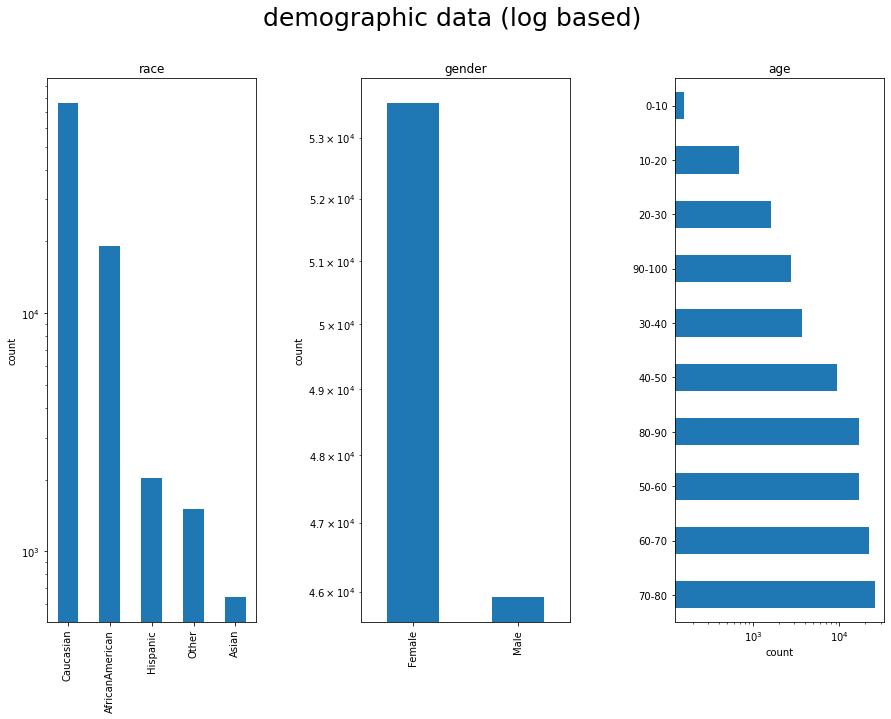

In [11]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 10))
diabetes.race.value_counts().plot(kind='bar', ax=ax[0])
ax[0].set_title('race')
ax[0].set_ylabel('count')
ax[0].set_yscale('log')
diabetes.gender.value_counts().plot(kind='bar', ax=ax[1])
ax[1].set_title('gender')
ax[1].set_ylabel('count')
ax[1].set_yscale('log')
diabetes.age.value_counts().plot(kind='barh', ax=ax[2])
ax[2].set_title('age')
ax[2].set_xlabel('count')
ax[2].set_xscale('log')
plt.subplots_adjust(wspace=0.5)
plt.suptitle('demographic data (log based)', size=25)

#### target variable - readmitted 

In [12]:
diabetes.readmitted.value_counts()

NO     53316
>30    35007
<30    11169
Name: readmitted, dtype: int64

'>30' and '<30' are treated as YES - Yes 1 and No 0 to look at readmission ratio

In [13]:
diabetes.readmitted = diabetes.readmitted.replace('NO',0)
diabetes.readmitted = diabetes.readmitted.replace(['<30', '>30'],1)

0    0.535882
1    0.464118
Name: readmitted, dtype: float64

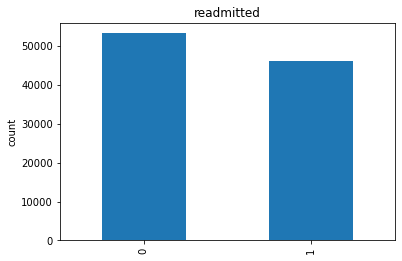

In [14]:
diabetes.readmitted.value_counts().plot(kind='bar', title='readmitted', ylabel='count')
diabetes.readmitted.value_counts(normalize=True)

#### 23 medication features

In [38]:
diabetes.loc[:,'metformin':'metformin-pioglitazone'].head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


'No' is treated as 0 and 'Up', 'Down' and 'Steady' are treated as 1 for all 23 medication features

In [16]:
diabetes.loc[:,'metformin':'metformin-pioglitazone'] = diabetes.loc[:,'metformin':'metformin-pioglitazone'].replace('No',0)
diabetes.loc[:,'metformin':'metformin-pioglitazone'] = diabetes.loc[:,'metformin':'metformin-pioglitazone'].replace(['Up','Down','Steady'],1)

In [17]:
drugs = diabetes.loc[:,'metformin':'metformin-pioglitazone']
drugs.head()

,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,...,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


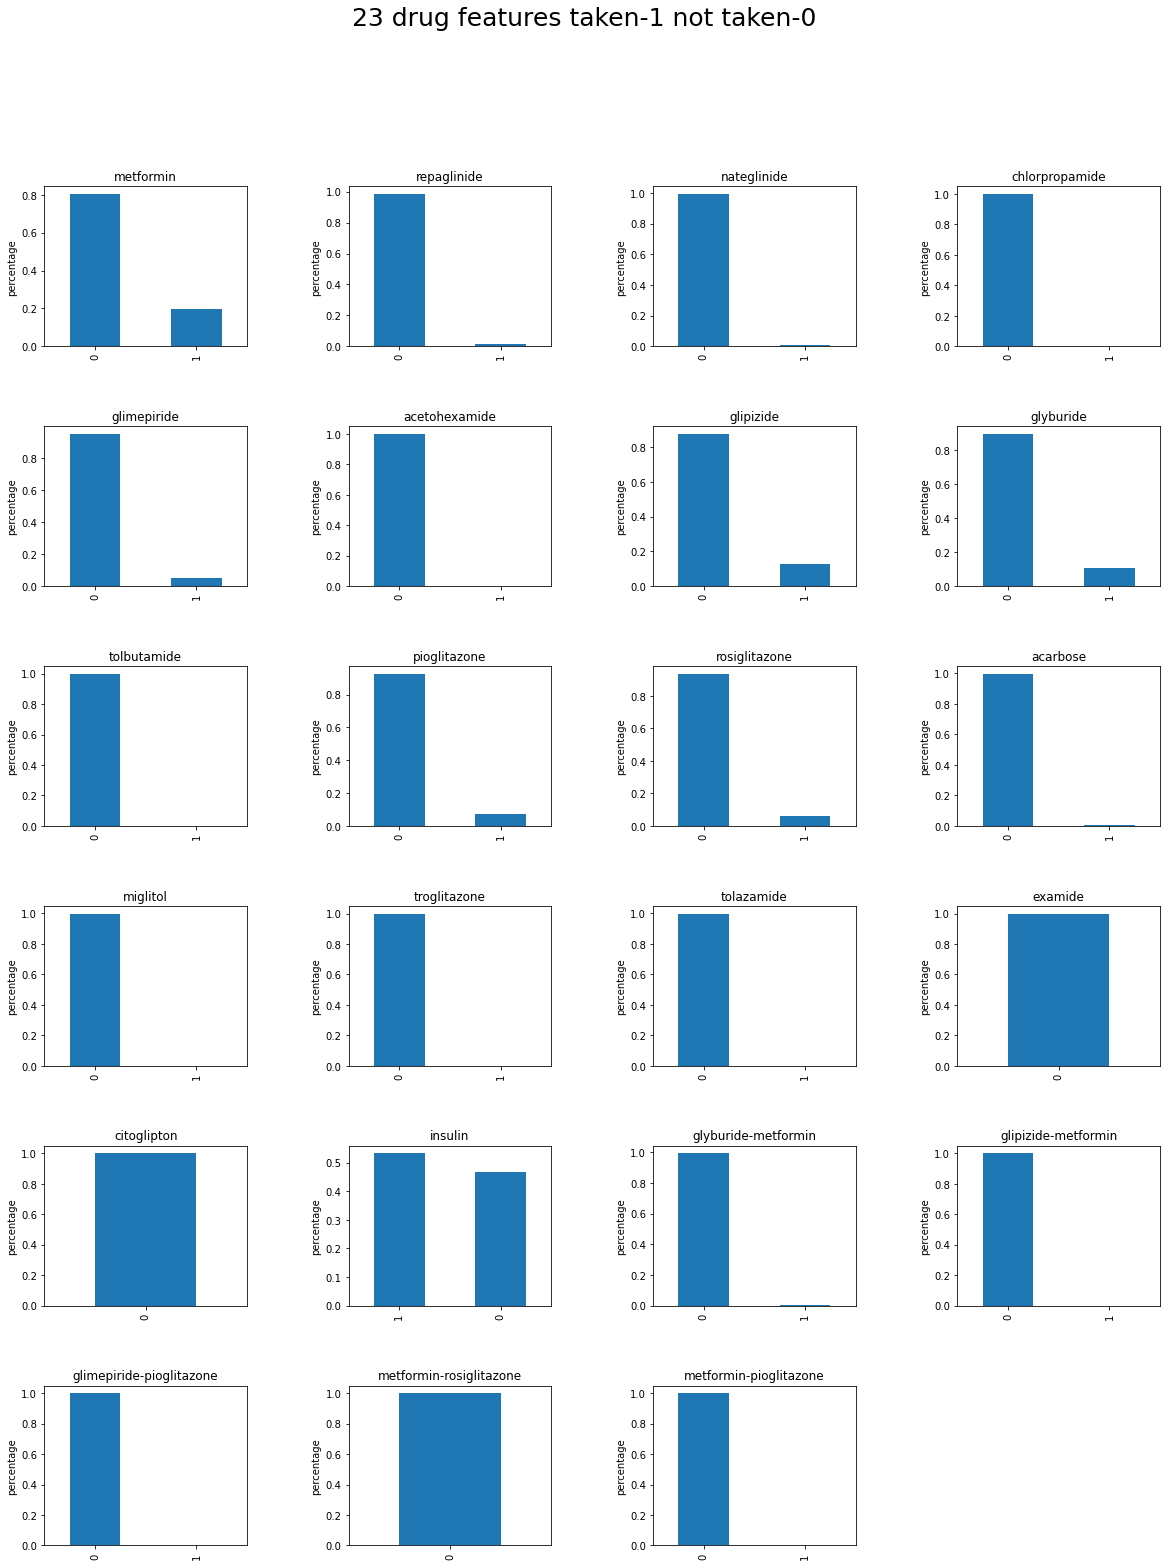

In [18]:
fig = plt.subplots(figsize=(20,25))
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.suptitle('23 drug features taken-1 not taken-0',size=25)

for i in range(len(drugs.columns)):
    ax = plt.subplot(6, 4, i + 1)
    ax.xaxis.set_label_position('top')
    #ax.set_xscale('log')
    drugs.iloc[:,i].value_counts(normalize=True).plot.bar(ax=ax, ylabel='percentage',title=drugs.columns[i])

### plotting categorical features against target variable readmitted

Text(0.5, 0.98, 'demographic data with readmission info')

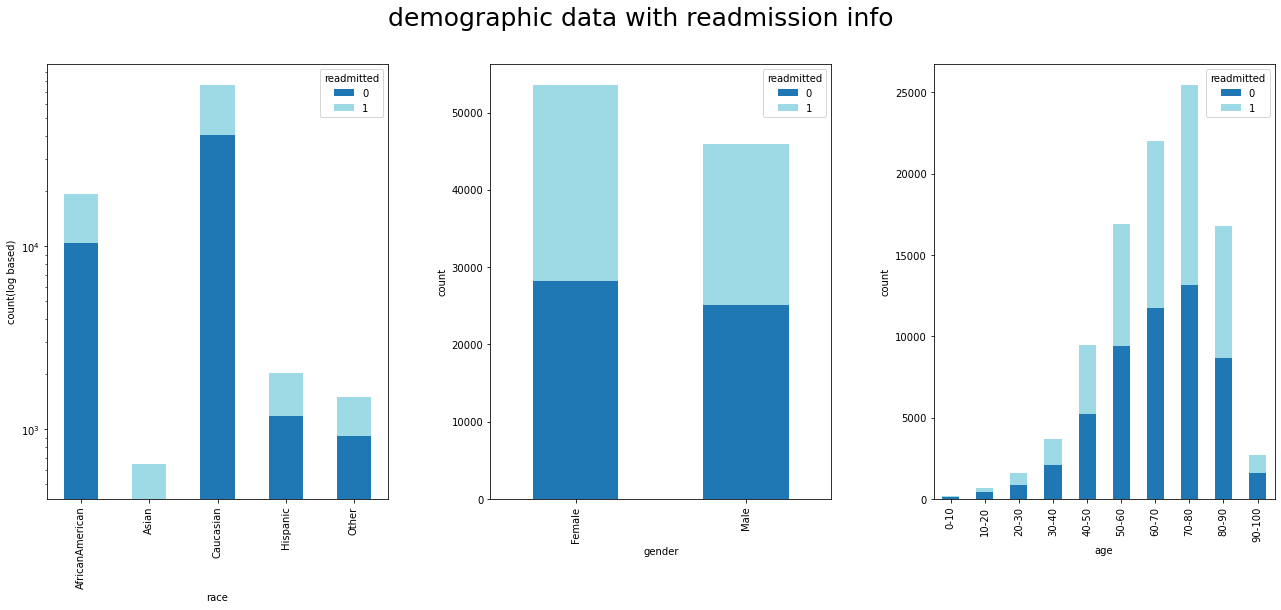

In [19]:
fig, ax = plt.subplots(nrows=1,ncols=3,figsize=(22,8))
ax[0].set_yscale('log')
pd.crosstab(index=diabetes.race,
            columns=diabetes.readmitted).plot.bar(ax=ax[0],
                                                  ylabel='count(log based)',
                                                  stacked=True,
                                                  cmap='tab20')
pd.crosstab(index=diabetes.gender,
            columns=diabetes.readmitted).plot.bar(ax=ax[1],
                                                  ylabel='count',
                                                  stacked=True,
                                                  cmap='tab20')
pd.crosstab(index=diabetes.age,
            columns=diabetes.readmitted).plot.bar(ax=ax[2],
                                                  ylabel='count',
                                                  stacked=True,
                                                  cmap='tab20')
plt.subplots_adjust(wspace=0.3)
plt.suptitle('demographic data with readmission info', size=25)

In [20]:
drug_readmit = diabetes.loc[:,'metformin':'readmitted']

In [21]:
d = pd.DataFrame()
for i in range(len(drug_readmit.columns)-1):
    d = d.append(drug_readmit.groupby([drug_readmit.columns[i]])['readmitted'].mean())
    #print(drug_readmit.groupby([drug_readmit.columns[i]])['readmitted'].mean())

In [22]:
d.index = drug_readmit.columns[0:-1]
d

,0,1
metformin,0.471083,0.435582
repaglinide,0.462756,0.551341
nateglinide,0.463936,0.489943
chlorpropamide,0.464132,0.447059
glimepiride,0.463624,0.473381
acetohexamide,0.464112,1.000000
glipizide,0.460358,0.490523
glyburide,0.464680,0.459293
tolbutamide,0.464150,0.318182
pioglitazone,0.462444,0.485647


<AxesSubplot:title={'center':'23 drugs mean with readmission info'}, ylabel='mean'>

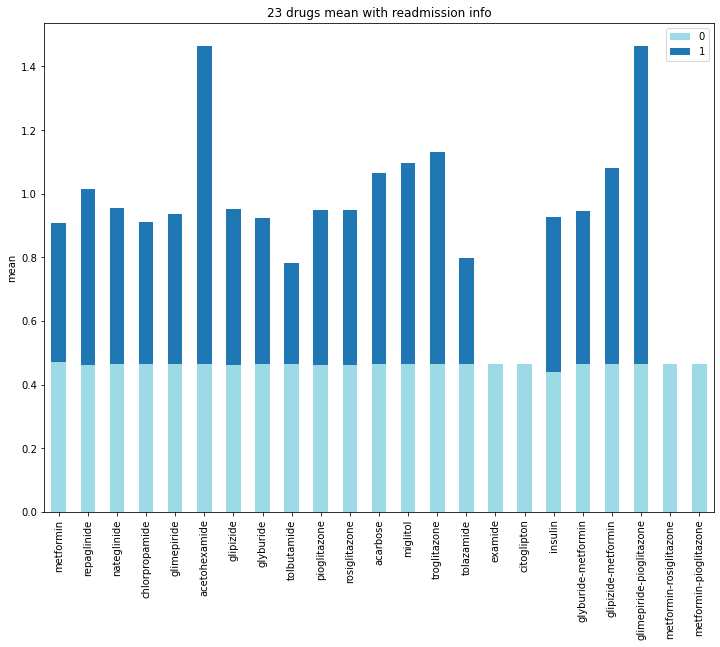

In [23]:
d.plot.bar(figsize=(12,9),title='23 drugs mean with readmission info', stacked=True, cmap='tab20_r', ylabel='mean')

### numerical features

time_in_hospital, num_lab_procedures, num_procedures, num_medications, number_outpatient, number_emergency and number_inpatient

In [24]:
round(diabetes.loc[:,'time_in_hospital':'number_inpatient'].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
time_in_hospital,99492.0,4.40,2.99,1.0,2.0,4.0,6.0,14.0
num_lab_procedures,99492.0,43.07,19.70,1.0,31.0,44.0,57.0,132.0
num_procedures,99492.0,1.34,1.70,0.0,0.0,1.0,2.0,6.0
num_medications,99492.0,16.03,8.12,1.0,10.0,15.0,20.0,81.0
number_outpatient,99492.0,0.37,1.28,0.0,0.0,0.0,0.0,42.0
number_emergency,99492.0,0.20,0.94,0.0,0.0,0.0,0.0,76.0
number_inpatient,99492.0,0.64,1.27,0.0,0.0,0.0,1.0,21.0


Text(0.5, 0.98, 'numerical feature distributions (log based)')

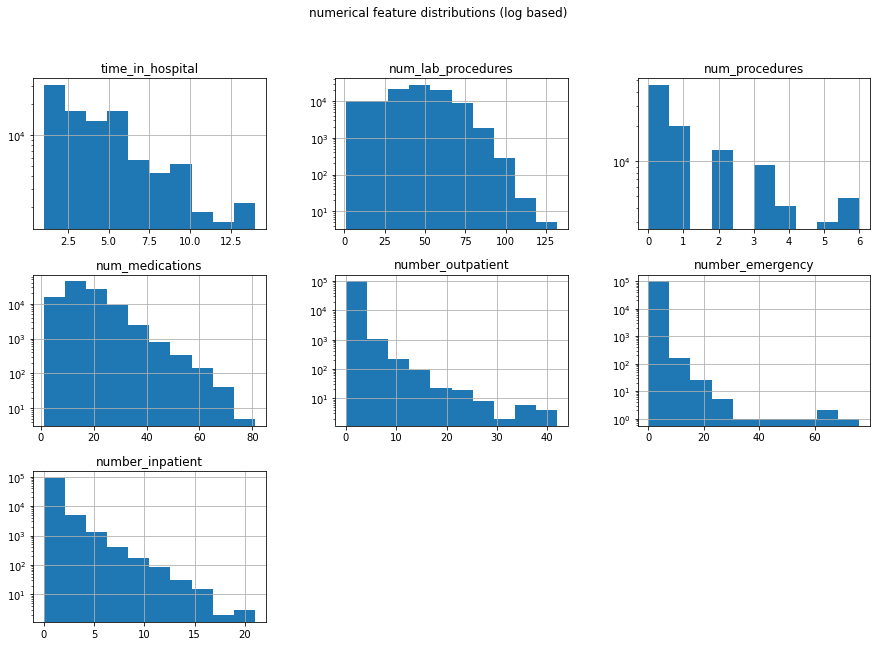

In [40]:
diabetes.loc[:,'time_in_hospital':'number_inpatient'].hist(figsize=(15,10),log=True)
plt.suptitle('numerical feature distributions (log based)')

number_outpatient, number_emergency and number_inpatient are right skewed

### plotting numerical features against target variable readmitted

,mean,std
readmitted,,
0,4.256658,2.965809
1,4.562175,3.002938


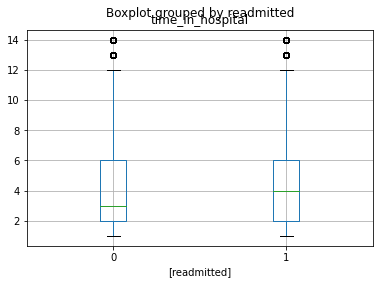

In [27]:
diabetes.boxplot(column=['time_in_hospital'],by = ['readmitted'])
pd.DataFrame(diabetes.groupby( ['readmitted'])['time_in_hospital'].describe().loc[:,['mean','std']])